In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import torch
from torch import nn
from mapsgan import experiments, data_loader, norm_scene, cos_scene
from mapsgan import ToyGenerator, ToyDiscriminator, BicycleGenerator, BaseSolver, BicycleSolver
from mapsgan.utils import get_metrics_all, get_model_dict
from mapsgan.evaluation import Visualization
from mapsgan.sgan import TrajectoryDiscriminator, TrajectoryGenerator
import matplotlib.pyplot as plt
from scipy.spatial.distance import squareform, pdist
import os

In [2]:
model_path = '../models/final/eth'
os.listdir(model_path)

['hyp_bicy_4_0_20190206-181905_epoch_6736',
 'hyp_clr_1_20190201-125912_epoch_5000',
 'hyp_cvae_1_20190201-152751_epoch_5000',
 'sgan_eth_12_model.pt',
 'sgn_bcy_2_20190205-202612_epoch_5000',
 'toymodel_2_20190205-230617_epoch_5000']

In [3]:
models = get_model_dict(model_path)
experiment = experiments.ETH() # we store filepaths and arguments in here

metrics = get_metrics_all(models, experiment)

### Figure 3

#Bubbles

In [4]:
prettynames = {'bicy':'Bicycle',
               'clr':'cLR',
               'cvae':'cVAE',
               'sgan':'SGAN',
               'sgn_bcy':'SGAN Bicycle',
               'toy':'Baseline'}
fs = 20

In [21]:
def add_legend(position, ax, fig, handles = None, labels = None, **kwargs):
        h, l = ax.get_legend_handles_labels()
        if not handles:
            handles = h
        if not labels:
            labels = l
        fig.legend(handles, labels, bbox_to_anchor = position,
            bbox_transform = fig.transFigure, **kwargs)

0.4594594594594595
0.2702702702702703
0.9324324324324325
0.7162162162162162
0.9054054054054054
1.0


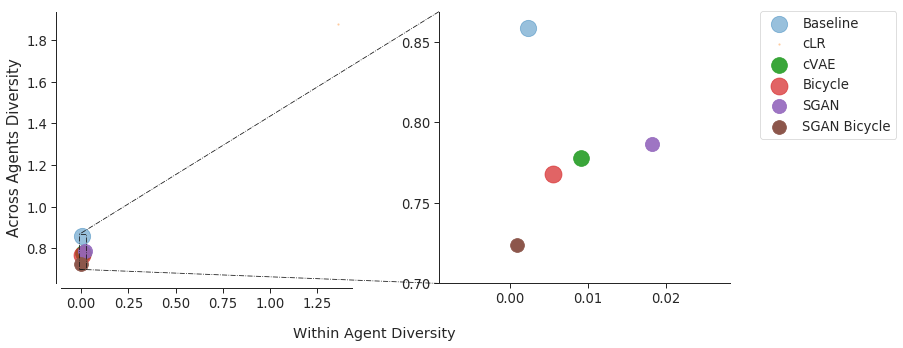

In [35]:
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
viz = Visualization()
fig = viz.plot.init_figure(figsize=[12, 5], wspace=0.3)
ax = viz.plot.init_subplot('', tot_tup=(1, 2), sp_tup=(0, 0))
ax2 = viz.plot.init_subplot('', tot_tup=(1, 2), sp_tup=(0, 1), offset=0)
y = [model['inter_div'] for key, model in metrics.items() if key!='clr']
x = [model['intra_div'] for key, model in metrics.items() if key!='clr']
maxcollisions=np.max([model['collisions'] for key, model in metrics.items()])
xlim = (np.min(x)-0.01, np.max(x)+0.01)
ylim = (np.min(y)-0.01, np.max(y)+0.01)
#zoom = get_inset(ax, lbwh = [0.5, 0., 0.5, 0.5], xlim=xlim, ylim=ylim, con=(2, 4))


for i, model in enumerate(metrics):
    ax.scatter(metrics[model]['intra_div'], metrics[model]['inter_div'],
               s=1000/(metrics[model]['fde']**2),
               label=prettynames[model],
               alpha=metrics[model]['collisions']/maxcollisions,
              color = viz.plot.colors[i],)
    if model != 'clr':
        ax2.scatter(metrics[model]['intra_div'], metrics[model]['inter_div'],
                   s=1000/(metrics[model]['fde']**2),
                   label=prettynames[model],
                   alpha=metrics[model]['collisions']/maxcollisions, 
                   color = viz.plot.colors[i])
        ax2.set_xlim(xlim)
        ax2.set_ylim(ylim)
        ax2.set_yticks(np.arange(0.70, 0.85, 0.05))
    print(metrics[model]['collisions']/maxcollisions)

mark_inset(ax, ax2, loc1=2, loc2=3, color='k', zorder = 100, ls='-.', clip_on=True)

#fig.suptitle('Diversity')
add_legend((1.1, 0.9), ax, fig)
ax.set_ylabel('Across Agents Diversity')
ax.text(0.8, -0.2, 'Within Agent Diversity', transform=ax.transAxes)
#ax.grid(True)

plt.show()

In [54]:
metrics

{'toy': {'collisions': 34,
  'fde': 1.9377995838012014,
  'inter_div': 0.8586667686364322,
  'intra_div': 0.0023691773414611815},
 'clr': {'collisions': 20,
  'fde': 21.32009917667934,
  'inter_div': 1.8768528109457627,
  'intra_div': 1.360764253139496},
 'cvae': {'collisions': 69,
  'fde': 2.00603960284165,
  'inter_div': 0.7776029762948039,
  'intra_div': 0.009110856056213378},
 'bicy': {'collisions': 53,
  'fde': 1.8632903905851501,
  'inter_div': 0.7678087521663046,
  'intra_div': 0.0054464578628540036},
 'sgan': {'collisions': 67,
  'fde': 2.245296236872673,
  'inter_div': 0.7865329704721534,
  'intra_div': 0.01816335916519165},
 'sgn_bcy': {'collisions': 74,
  'fde': 2.294471526784556,
  'inter_div': 0.7236192133716138,
  'intra_div': 0.0009182214736938477}}

In [103]:
import matplotlib
matplotlib.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': True,
          'axes.edgecolor': '.15',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.forma

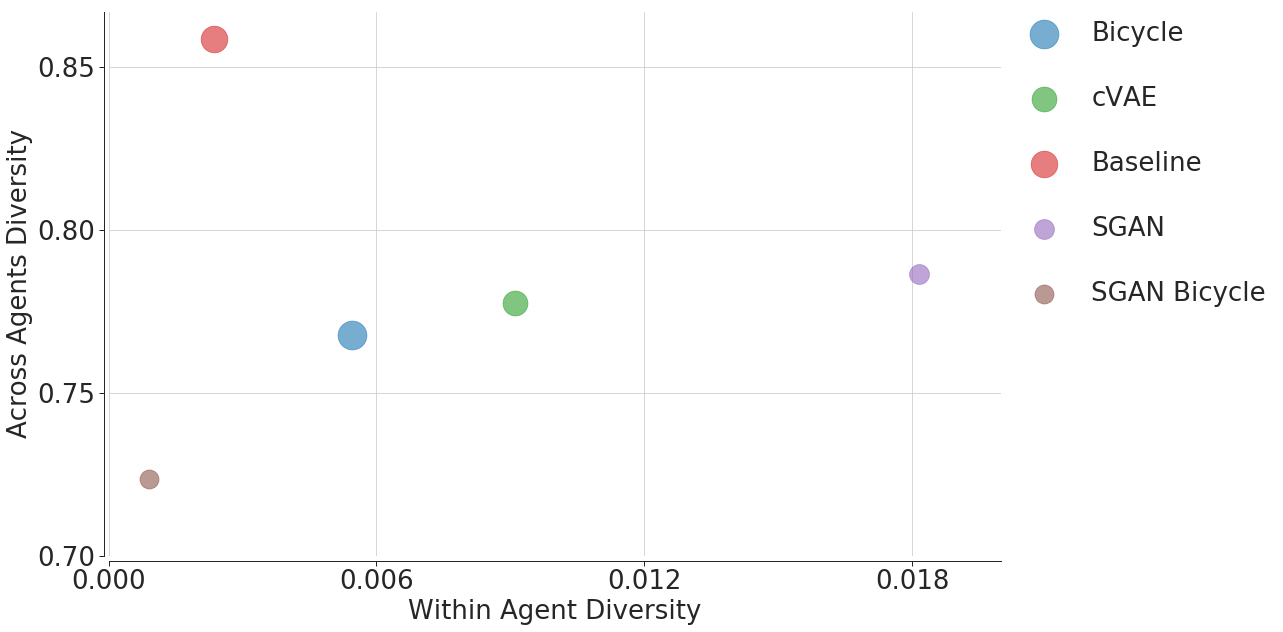

In [102]:
fig = viz.plot.init_figure(figsize=[16, 10], wspace=0.3)
fs = 26
ax = viz.plot.init_subplot('', tot_tup=(1, 1), sp_tup=(0, 0))
order = ['bicy', 'clr', 'cvae', 'toy', 'sgan', 'sgn_bcy']
maxcollisions=np.max([model['collisions'] for key, model in metrics.items()])
for i, model in enumerate(order):
    if model != 'clr':
        ax.scatter(metrics[model]['intra_div'], metrics[model]['inter_div'],
                   s=10000/(metrics[model]['fde']**4),
                   label=prettynames[model],
                   alpha=0.6,
                  color = viz.plot.colors[i],)
ax.set_xlim(0, 0.02)
ax.grid(True)
add_legend((1.15, 0.9), ax, fig, labelspacing=1.5, frameon=False, fontsize = fs)
ax.set_ylabel('Across Agents Diversity', fontsize = fs)
ax.set_xlabel('Within Agent Diversity', fontsize = fs)
ax.xaxis.set_tick_params(labelsize=fs)
ax.yaxis.set_tick_params(labelsize=fs)
ax.set_xticks(np.arange(0, 0.0181, 0.006))
ax.set_yticks(np.arange(0.70, 0.87, 0.05))

In [41]:
metrics

{'toy': {'collisions': 34,
  'fde': 1.9377995838012014,
  'inter_div': 0.8586667686364322,
  'intra_div': 0.0023691773414611815},
 'clr': {'collisions': 20,
  'fde': 21.32009917667934,
  'inter_div': 1.8768528109457627,
  'intra_div': 1.360764253139496},
 'cvae': {'collisions': 69,
  'fde': 2.00603960284165,
  'inter_div': 0.7776029762948039,
  'intra_div': 0.009110856056213378},
 'bicy': {'collisions': 53,
  'fde': 1.8632903905851501,
  'inter_div': 0.7678087521663046,
  'intra_div': 0.0054464578628540036},
 'sgan': {'collisions': 67,
  'fde': 2.245296236872673,
  'inter_div': 0.7865329704721534,
  'intra_div': 0.01816335916519165},
 'sgn_bcy': {'collisions': 74,
  'fde': 2.294471526784556,
  'inter_div': 0.7236192133716138,
  'intra_div': 0.0009182214736938477}}

#Bars

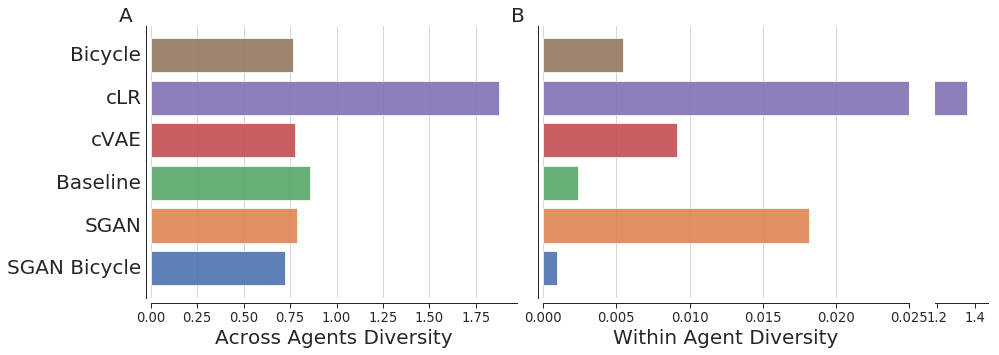

In [18]:
viz = Visualization()
viz.plot.init_figure(figsize=[15, 5], wspace=0.5)
order = ['bicy', 'clr', 'cvae', 'toy', 'sgan', 'sgn_bcy']
ax = viz.plot.init_subplot('', tot_tup=(1, 11), sp_tup=(0, 0), rowspan=5)
ax2 = viz.plot.init_subplot('', tot_tup=(1, 11), sp_tup=(0, 5), rowspan=5)
ax3 = viz.plot.init_subplot('', tot_tup=(1, 11), sp_tup=(0, 10))
for i, model in enumerate(order[::-1]):
    ax.barh([i], metrics[model]['inter_div'], height=0.8, alpha=0.9)
    ax2.barh([i], metrics[model]['intra_div'], height=0.8, alpha=0.9)
    ax.text(-0.05, i,
           prettynames[model],
           va='center', ha='right', fontsize=fs)
    ax3.barh([i], metrics[model]['intra_div'], height=0.8, alpha=0.9)
    
ax.set_xlabel('Across Agents Diversity', fontsize=fs)
ax2.set_xlabel('Within Agent Diversity', fontsize=fs)
ax.set_yticks([])
ax2.set_xlim(0, 0.025)
ax3.set_xlim(1.19, 1.47)
ax2.set_yticks([])
ax3.spines['left'].set_visible(False)
ax3.set_yticks([])
ax.grid(True)
ax2.grid(True)
ax.text(-0.05, 1, 'A', transform =ax.transAxes, fontsize = fs,va='bottom', ha='right')
ax2.text(-0.05, 1, 'B', transform =ax2.transAxes, fontsize = fs,va='bottom', ha='right')
plt.show()

### Figure 4

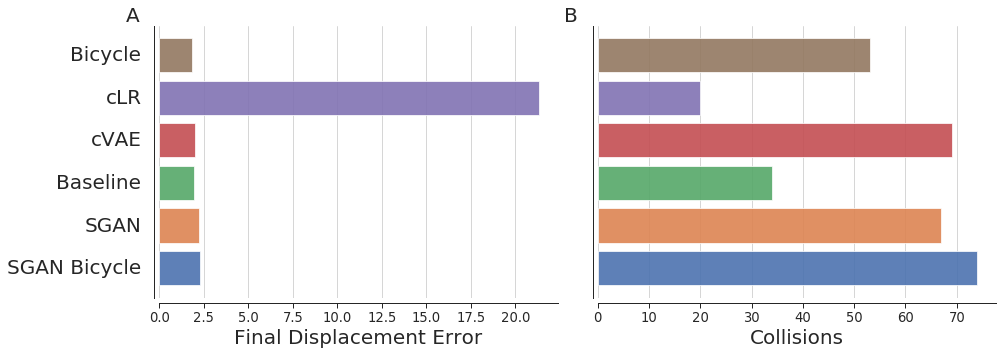

In [13]:
viz = Visualization()
viz.plot.init_figure(figsize=[15, 5])

order = ['bicy', 'clr', 'cvae', 'toy', 'sgan', 'sgn_bcy']
ax = viz.plot.init_subplot('', tot_tup=(1, 2), sp_tup=(0, 0))
ax2 = viz.plot.init_subplot('', tot_tup=(1, 2), sp_tup=(0, 1))
for i, model in enumerate(order[::-1]):
    ax.barh([i], metrics[model]['fde'], height=0.8, alpha=0.9)
    ax2.barh([i], metrics[model]['collisions'], height=0.8, alpha=0.9)
    ax.text(-1, i,
           prettynames[model],
           va='center', ha='right', fontsize=fs)
    ax.grid(True)
    ax2.grid(True)

#ax.legend()
ax.set_xlabel('Final Displacement Error', fontsize =fs)
ax2.set_xlabel('Collisions', fontsize = fs)
ax.set_yticks([])
ax2.set_yticks([])
ax.text(-0.05, 1, 'A', transform =ax.transAxes, fontsize = fs,va='bottom', ha='right')
ax2.text(-0.05, 1, 'B', transform =ax2.transAxes, fontsize = fs,va='bottom', ha='right')
#ax.set_xlabel('Accuracy (L1 Distance)')
#ax.grid(True)

plt.show()

In [16]:
metrics

{'toy': {'collisions': 34,
  'fde': 1.9377995838012014,
  'inter_div': 0.8586667686364322,
  'intra_div': 0.00715404748916626},
 'clr': {'collisions': 20,
  'fde': 21.32009917667934,
  'inter_div': 1.8768528109457627,
  'intra_div': 2.0710229873657227},
 'cvae': {'collisions': 69,
  'fde': 2.00603960284165,
  'inter_div': 0.7776029762948039,
  'intra_div': 0.0017258524894714355},
 'bicy': {'collisions': 53,
  'fde': 1.7205384292772838,
  'inter_div': 0.8480616315556537,
  'intra_div': 0.004839003086090088},
 'sgan': {'collisions': 67,
  'fde': 2.245296236872673,
  'inter_div': 0.7865329704721534,
  'intra_div': 0.18234193325042725},
 'sgn_bcy': {'collisions': 74,
  'fde': 2.294471526784556,
  'inter_div': 0.7236192133716138,
  'intra_div': 0.030468404293060303}}

In [14]:
morder = ['inter_div', 'intra_div', 'collisions', 'fde']
msg = '\t&\t'
msg += '\t&\t'.join(['Across Agents Diversity', 'Within Agent Diversity', 'Collisions', 'FDE'])
msg += '\n'
for key in order:
    m = metrics[key]
    msg += f'{prettynames[key]}\t'
    for metric in morder:
        val = m[metric]
        msg += f'&\t{val:.3f}\t' if isinstance(val, float) else f'&\t{val}\t'
    msg += '\\'+'\\\n'
print(msg)

	&	Across Agents Diversity	&	Within Agent Diversity	&	Collisions	&	FDE
Bicycle	&	0.768	&	0.005	&	53	&	1.863	\\
cLR	&	1.877	&	1.361	&	20	&	21.320	\\
cVAE	&	0.778	&	0.009	&	69	&	2.006	\\
Baseline	&	0.859	&	0.002	&	34	&	1.938	\\
SGAN	&	0.787	&	0.018	&	67	&	2.245	\\
SGAN Bicycle	&	0.724	&	0.001	&	74	&	2.294	\\



In [29]:
[key for key in metric]

['i', 'n', 't', 'r', 'a', '_', 'd', 'i', 'v']

In [147]:
msg = ''
for key in order:
    m = metrics[key]
    msg += f'{prettynames[key]}\t'
    for metric in morder:
        val = m[metric]
        msg += f'&\t{val:.3f}\t' if isinstance(val, float) else f'&\t{val}\t'
    msg += '\\'+'\\\n'
print(msg)

Bicycle	&	0.816	&	0.002	&	43	&	1.808	\\
cLR	&	1.877	&	1.361	&	20	&	21.320	\\
cVAE	&	0.778	&	0.009	&	69	&	2.006	\\
Baseline	&	0.859	&	0.002	&	34	&	1.938	\\
SGAN	&	0.787	&	0.018	&	67	&	2.245	\\
SGAN Bicycle	&	0.724	&	0.001	&	74	&	2.294	\\



In [146]:
metrics

{'toy': {'collisions': 34,
  'fde': 1.9377995838012014,
  'inter_div': 0.8586667686364322,
  'intra_div': 0.0023691773414611815},
 'clr': {'collisions': 20,
  'fde': 21.32009917667934,
  'inter_div': 1.8768528109457627,
  'intra_div': 1.360764253139496},
 'cvae': {'collisions': 69,
  'fde': 2.00603960284165,
  'inter_div': 0.7776029762948039,
  'intra_div': 0.009110856056213378},
 'bicy': {'collisions': 43,
  'fde': 1.8075219750404359,
  'inter_div': 0.8159079227492174,
  'intra_div': 0.002039480209350586},
 'sgan': {'collisions': 67,
  'fde': 2.245296236872673,
  'inter_div': 0.7865329704721534,
  'intra_div': 0.01816335916519165},
 'sgn_bcy': {'collisions': 74,
  'fde': 2.294471526784556,
  'inter_div': 0.7236192133716138,
  'intra_div': 0.0009182214736938477}}